#  4.2 Exercise: Predicting Fuel Efficiency

In [1]:
# Load auto data
import pandas as pd
auto_mpg_df = pd.read_csv('auto-mpg.csv')
auto_mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [2]:
list(auto_mpg_df.columns)

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin',
 'car name']

In [3]:
auto_mpg_df.shape

(398, 9)

In [4]:
# Remove the car name column
auto_df = auto_mpg_df.drop(['car name'], axis=1)

In [5]:
auto_df.shape

(398, 8)

In [6]:
auto_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [7]:
auto_df.isnull()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False


In [8]:
auto_df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [9]:
auto_df.isnull().values.any()

False

In [10]:
auto_df['horsepower'].isna().sum()

0

In [11]:
auto_df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [12]:
auto_df['horsepower'].nunique()

94

In [13]:
pd.to_numeric(auto_df['horsepower'], errors='coerce').notnull().all()

False

In [14]:
auto_df[auto_df['horsepower'].isnull()].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin


In [15]:
# Convert 'horsepower' to float
auto_df['horsepower'] = auto_df['horsepower'].apply(pd.to_numeric, errors='coerce')

In [16]:
auto_df['horsepower'].dtype

dtype('float64')

In [17]:
# Replace nulls with column mean
auto_df['horsepower'].fillna(float(auto_df['horsepower'].mean()), inplace=True)

In [18]:
auto_df['horsepower'].mean()

104.46938775510206

In [19]:
auto_df['horsepower'].unique()

array([130.        , 165.        , 150.        , 140.        ,
       198.        , 220.        , 215.        , 225.        ,
       190.        , 170.        , 160.        ,  95.        ,
        97.        ,  85.        ,  88.        ,  46.        ,
        87.        ,  90.        , 113.        , 200.        ,
       210.        , 193.        , 104.46938776, 100.        ,
       105.        , 175.        , 153.        , 180.        ,
       110.        ,  72.        ,  86.        ,  70.        ,
        76.        ,  65.        ,  69.        ,  60.        ,
        80.        ,  54.        , 208.        , 155.        ,
       112.        ,  92.        , 145.        , 137.        ,
       158.        , 167.        ,  94.        , 107.        ,
       230.        ,  49.        ,  75.        ,  91.        ,
       122.        ,  67.        ,  83.        ,  78.        ,
        52.        ,  61.        ,  93.        , 148.        ,
       129.        ,  96.        ,  71.        ,  98.  

In [20]:
pd.get_dummies(auto_df['origin'])

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
393,1,0,0
394,0,1,0
395,1,0,0
396,1,0,0


In [21]:
dmy_auto_df = pd.get_dummies(auto_df, columns=['origin'], prefix='dummy', prefix_sep='_')

In [22]:
dmy_auto_df.shape

(398, 10)

In [23]:
auto_df.shape

(398, 8)

In [24]:
auto_df['origin']

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: origin, Length: 398, dtype: int64

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
auto_mx = dmy_auto_df.corr()
auto_mx
# Weight, displacement, horsepower, and cylinders have high negative correlation.
# Model year, and acceleration have a lesser, positive correlation with mpg.


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,dummy_1,dummy_2,dummy_3
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,-0.568192,0.259022,0.442174
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,0.604351,-0.352861,-0.396479
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,0.651407,-0.373886,-0.433505
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,0.486083,-0.281258,-0.321325
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,0.598398,-0.298843,-0.440817
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,-0.250806,0.204473,0.109144
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,-0.139883,-0.024489,0.193101
dummy_1,-0.568192,0.604351,0.651407,0.486083,0.598398,-0.250806,-0.139883,1.000000,-0.597198,-0.643317
dummy_2,0.259022,-0.352861,-0.373886,-0.281258,-0.298843,0.204473,-0.024489,-0.597198,1.000000,-0.229895
dummy_3,0.442174,-0.396479,-0.433505,-0.321325,-0.440817,0.109144,0.193101,-0.643317,-0.229895,1.000000


<AxesSubplot:>

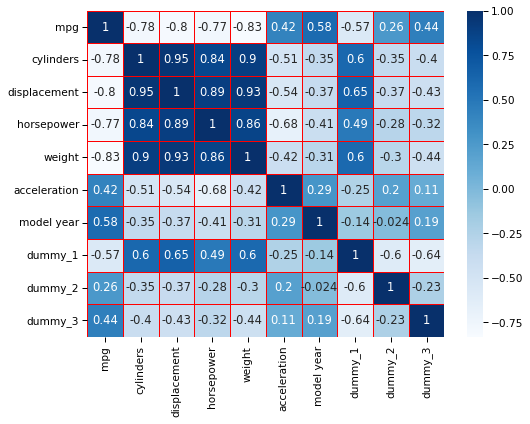

In [26]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.2)
sns.heatmap(auto_mx, annot=True, cmap='Blues', linecolor='red', linewidth=1)

<Figure size 720x720 with 0 Axes>

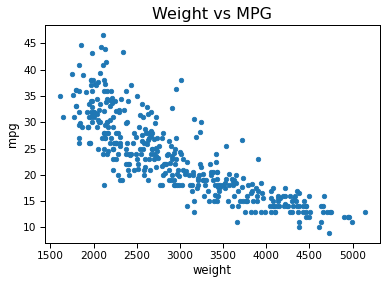

In [27]:
# plot mpg vs weight
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
dmy_auto_df.plot(kind = 'scatter', x = 'weight', y = 'mpg')
plt.title('Weight vs MPG', fontsize=16)
plt.show()


#  The scatter plot shows the strong negative correlation of -0.83.

#  There exists heteroscedasticity

#  Note the lesser dispersion of data at higher weights and lesser mpg.

In [28]:
# Install scikit
!pip install -U "scikit-learn==0.23.1"

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Admin\anaconda3\python.exe' 'C:\Users\Admin\AppData\Local\Temp\pip-standalone-pip-46vrj62z\__env_pip__.zip\pip' install --ignore-installed --no-user --prefix 'C:\Users\Admin\AppData\Local\Temp\pip-build-env-fkz24ujr\overlay' --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- setuptools wheel 'Cython>=0.28.5' 'numpy==1.13.3; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"' and platform_python_implementation == '"'"'CPython'"'"'' 'numpy==1.14.0; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"' and platform_python_implementation != '"'"'CPython'"'"'' 'numpy==1.14.5; python_version=='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.6'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.7'"'"' and pl


  Using cached scikit-learn-0.23.1.tar.gz (7.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'


    blas_opt_info:
    blas_mkl_info:
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries mkl_rt not found in ['C:\\Users\\Admin\\anaconda3\\lib', 'C:\\', 'C:\\Users\\Admin\\anaconda3\\libs']
      NOT AVAILABLE
  
    blis_info:
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries blis not found in ['C:\\Users\\Admin\\anaconda3\\lib', 'C:\\', 'C:\\Users\\Admin\\anaconda3\\libs']
      NOT AVAILABLE
  
    openblas_info:
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries openblas not found in ['C:\\Users\\Admin\\anaconda3\\lib', 'C:\\', 'C:\\Users\\Admin\\anaconda3\\libs']
    get_default_fcompiler: matching types: '

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split

In [30]:
# Create X, y features
X = dmy_auto_df.drop('mpg', axis=1)
y = dmy_auto_df['mpg']

In [31]:
X, y

(     cylinders  displacement  horsepower  weight  acceleration  model year  \
 0            8         307.0       130.0    3504          12.0          70   
 1            8         350.0       165.0    3693          11.5          70   
 2            8         318.0       150.0    3436          11.0          70   
 3            8         304.0       150.0    3433          12.0          70   
 4            8         302.0       140.0    3449          10.5          70   
 ..         ...           ...         ...     ...           ...         ...   
 393          4         140.0        86.0    2790          15.6          82   
 394          4          97.0        52.0    2130          24.6          82   
 395          4         135.0        84.0    2295          11.6          82   
 396          4         120.0        79.0    2625          18.6          82   
 397          4         119.0        82.0    2720          19.4          82   
 
      dummy_1  dummy_2  dummy_3  
 0          1   

In [32]:
# Randomly split data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.2, random_state=101)

In [33]:
# Create model
from sklearn.linear_model import LinearRegression
olr_model = LinearRegression()

In [34]:
# Fit model on train data
olr_model.fit(X_train,y_train)

LinearRegression()

In [63]:
predictions = olr_model.predict(X_train)

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [65]:
r2_score(y_train, predictions)

0.7843733698740114

In [69]:
y_pred_test = olr_model.predict(X_test)

In [70]:
r2_score(y_test, y_pred_test)

0.8388486069506715

#  The R2 on the test data is 84% and on the train data is 78%.

In [71]:
mean_squared_error(y_train, predictions, squared=False)

3.643395162489511

In [72]:
mean_squared_error(y_test, y_pred_test, squared=False)

3.053922928570986

#  The RMSE is 3.64 on train and 3.05 on test data.

In [73]:
'mean_absolute_error : ', mean_absolute_error(y_train, predictions),

('mean_absolute_error : ', 2.695924505844267)

In [74]:
'mean_absolute_error : ', mean_absolute_error(y_test, y_pred_test),

('mean_absolute_error : ', 2.3049037908873076)

#  The MAE is 2.70 on train and 2.30 on test data.

In [75]:
# 'root_mean_squared_error :' , mean_squared_error(y_test, predictions, squared=False)


In [76]:
# olr_model.fit(X_test,y_test)

In [77]:
# predictions_train = olr_model.predict(X_train)

In [78]:
# 'root_mean_squared_error :' , mean_squared_error(y_train, predictions_train, squared=False),

In [79]:
# 'mean_absolute_error : ', mean_absolute_error(y_test, predictions),

In [80]:
# 'mean_absolute_error : ', mean_absolute_error(y_train, predictions_train),

In [81]:
# 'R2 : ', r2_score(y_test, predictions)

In [82]:
# 'R2 : ', r2_score(y_train, predictions_train)

#  Perform Ridge Regression on same data

In [83]:
from sklearn.linear_model import Ridge

In [84]:
train_ridge = Ridge(alpha=0.01)
train_ridge.fit(X_train, y_train) 

Ridge(alpha=0.01)

In [85]:
pred_train_ridge = train_ridge.predict(X_train)

In [86]:
'root_mean_squared_error :' , mean_squared_error(y_train, pred_train_ridge, squared=False)

('root_mean_squared_error :', 3.250876019625667)

In [87]:
test_ridge = Ridge(alpha=0.01)
test_ridge.fit(X_test, y_test)

Ridge(alpha=0.01)

In [88]:
pred_test_ridge = test_ridge.predict(X_test)

In [89]:
'root_mean_squared_error :' , mean_squared_error(y_test, pred_test_ridge, squared=False)

('root_mean_squared_error :', 3.053923105751299)

#  The RMSE is slightly lower in the test data(0.20).

In [90]:
'mean_absolute_error : ', mean_absolute_error(y_train, pred_train_ridge),

('mean_absolute_error : ', 2.5135821068442072)

In [91]:
'mean_absolute_error : ', mean_absolute_error(y_test, pred_test_ridge),

('mean_absolute_error : ', 2.3046595917233375)

#  The MAE is 2.51 on train, and 2.30 on test data.

In [92]:
'R2 : ', r2_score(y_train, pred_train_ridge)

('R2 : ', 0.8283314832590808)

In [93]:
'R2 : ', r2_score(y_test, pred_test_ridge)

('R2 : ', 0.8388485882515389)

#  The R2 is 83% on train, and 84% on test data.